# Object Detection & Recognition in Image, Video clip and Live Video Feed using YOLO and Darkflow


## Steps to Download & Install Darkflow in Google Colab/Kaggle Notebook
**Note: To install in pc. Remove the !, % from below commands and execute**

In [1]:
# Clone/Download darkflow library from github
! git clone https://github.com/thtrieu/darkflow.git
 

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 40.93 MiB/s, done.
Resolving deltas: 100% (1761/1761), done.


In [2]:
% cd darkflow

/content/darkflow


In [1]:
# Compile and Build Darkflow
! python3 setup.py build_ext --inplace

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [4]:
! pip install . 

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831105 sha256=c72589b018ed62ab5748d7e3ed1688c180548c084131289f56bdc81c26ea4c1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-x72llrj_/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


In [5]:
# To Test if Darkflow is installed correctly and working. This is one of the command
!flow --h







Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --trainer        training algorithm
  --momentum       applicable for rmsprop and momentum optimizers
  --verbalise      say out loud while building graph
  --train          train the whole net
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --savepb         save net and weight to a .pb file
  --gpu            how 

## Import Modules

In [ ]:
from darkflow.net.build import TFNet   # required for YOLO darkflow
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Options

There are several options to specify before running YOLO. 
- __model__: it specifies which model to use.
  - YOLO, YOLO-VOC, TINY-YOLO, TINY-YOLO-VOC, TINY-YOLO-4C are the available choices.
  
- __load__: it specifies where the pre-trained weights are. You can use your own weights after training on your own dataset. That is the other purpose.
  - Download the weights from Darkflow github page

- __threshold__: it specifies the threshold for the confidence value of the predicted object. If you increase the value, the model will return fewer objects as result.

- __gpu__: it specifies whether you want to use GPU. If not specified, the model will be run soley on CPU.

## Specify Options & Build the Model

In [89]:
options = { 'model': './cfg/yolo.cfg',  # specifies which cofiguration to use
            'load': './yolo.weights',   # loads the pretrained weights
            'threshold': 0.1,           # Higher value results in fewer objects detection 
            'gpu': 1.0     # Comment if not using GPU
          }
tfnet = TFNet(options)  

Parsing ./cfg/yolo.cfg
Loading ./yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.022332429885864258s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bno

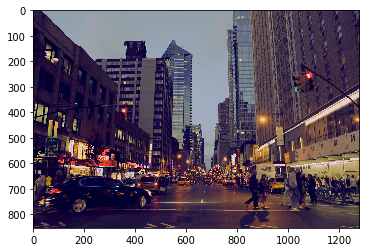

In [90]:
# Use any path where an image is present
img = mpimg.imread('/content/new-york-748595_1280.jpg')
imgplot = plt.imshow(img)


## Predicts and label objects in the image with their confidence Score

In [70]:
import pprint    # Pretty print

results = tfnet.return_predict(img)
pprint.pprint(results)  # Display result in nicely formatted multi lines

[{'bottomright': {'x': 112, 'y': 679},
  'confidence': 0.13810143,
  'label': 'person',
  'topleft': {'x': 83, 'y': 639}},
 {'bottomright': {'x': 180, 'y': 659},
  'confidence': 0.12604693,
  'label': 'person',
  'topleft': {'x': 156, 'y': 642}},
 {'bottomright': {'x': 63, 'y': 755},
  'confidence': 0.44178635,
  'label': 'person',
  'topleft': {'x': 8, 'y': 634}},
 {'bottomright': {'x': 527, 'y': 710},
  'confidence': 0.18361117,
  'label': 'car',
  'topleft': {'x': 495, 'y': 652}},
 {'bottomright': {'x': 891, 'y': 781},
  'confidence': 0.5602645,
  'label': 'person',
  'topleft': {'x': 836, 'y': 632}},
 {'bottomright': {'x': 1207, 'y': 767},
  'confidence': 0.15931426,
  'label': 'person',
  'topleft': {'x': 474, 'y': 622}},
 {'bottomright': {'x': 1008, 'y': 744},
  'confidence': 0.17859434,
  'label': 'person',
  'topleft': {'x': 943, 'y': 637}},
 {'bottomright': {'x': 1069, 'y': 788},
  'confidence': 0.57204366,
  'label': 'person',
  'topleft': {'x': 1012, 'y': 617}},
 {'bottomrig

## Bounding Box Function to create bounding boxes on detected objects

In [ ]:
import numpy as np

def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

## Display Resultant Image with Bounding Boxes

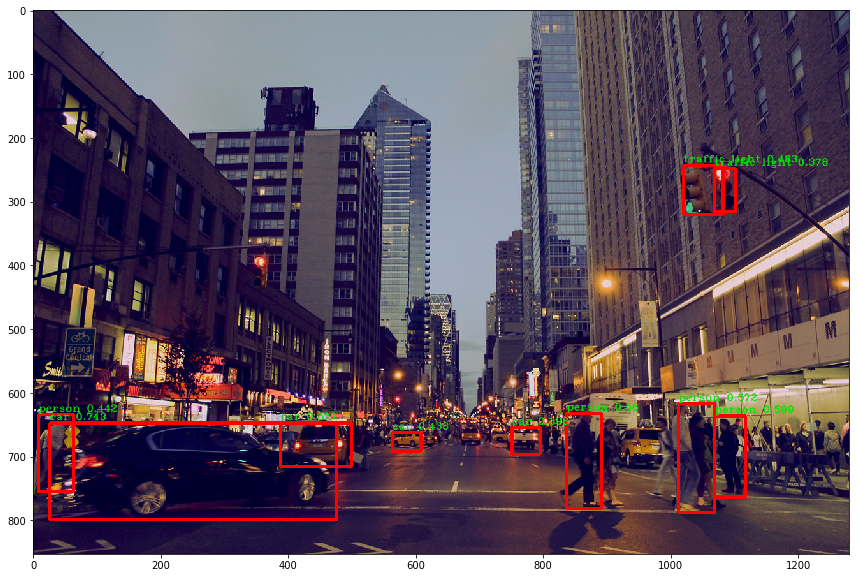

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(img, results))

## Object Detection in Live Video Feed
(TBD). Accessing webcam is tidious task in Google colab. Also cv2.imshow() is disabled in colab due to colab hang issue.
Darkflow is not supported in Tensorflow 2.0 due to some discarded packages

In [78]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()
    
    if ret:
        results = tfnet.return_predict(frame)
        image = boxing(frame, results)
        cv2.imshow('YOLOV2 - Object Detection', image)
        if cv2.waitKey(1) == 13: #13 is the Enter Key
            break

capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored

## Object Detection and bounding boxes in Real Time Video
Note: Reqires a GPU to make it run flawless

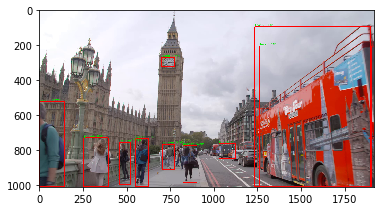

In [87]:
import cv2

# Using OpenCV to initialize the webcam
cap = cv2.VideoCapture('/content/test_video.mp4')
frame_number = 0

# fig, ax = plt.subplots(figsize=(20, 10))
while True:
    ret, frame = cap.read()
    frame_number += 1
    if ret:
        results = tfnet.return_predict(img)
        
        plt.imshow(boxing(img, results))

#         cv2.imshow("Objet Detection YOLO", frame)
        if frame_number == 100:
            break
        if cv2.waitKey(1) == 13: #13 is the Enter Key
            break

cap.release()
cv2.destroyAllWindows()


In [91]:
# cap = cv2.VideoCapture('/content/test_video.mp4')
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

# fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# out = cv2.VideoWriter('./sample_video/output.avi',fourcc, 20.0, (int(width), int(height)))

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
    
#     if ret == True:
#         frame = np.asarray(frame)
#         results = tfnet.return_predict(frame)

#         new_frame = boxing(frame, results)

#         # Display the resulting frame
#         out.write(new_frame)
#         cv2.imshow('frame',new_frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     else:
#         break

# # When everything done, release the capture
# cap.release()
# out.release()
# cv2.destroyAllWindows()

DisabledFunctionError: ignored